# Dedalus tutorial 2
#### Fields and operators

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dedalus.public as d3
from dedalus.extras.plot_tools import plot_bot_2d
figkw = {'figsize':(6,4), 'dpi':100}

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

creating a field

In [3]:
coords = d3.CartesianCoordinates('x', 'y')
dist = d3.Distributor(coords, dtype=np.float64)

xbasis = d3.RealFourier(coords['x'], 64, bounds=(-np.pi, np.pi), dealias=3/2)
ybasis = d3.Chebyshev(coords['y'], 64, bounds=(-1, 1), dealias=3/2)

f = dist.Field(name='f', bases=(xbasis, ybasis))
e = dist.Field(name='e', bases=(xbasis, ybasis))

Making a vector field with only an x component

In [4]:
u = dist.VectorField(coords, name='u', bases=xbasis)

In [5]:
f.layout.grid_space

array([False, False])

In [6]:
e.layout.grid_space

array([False, False])

'g' is grid space and 'c' is coefficent space

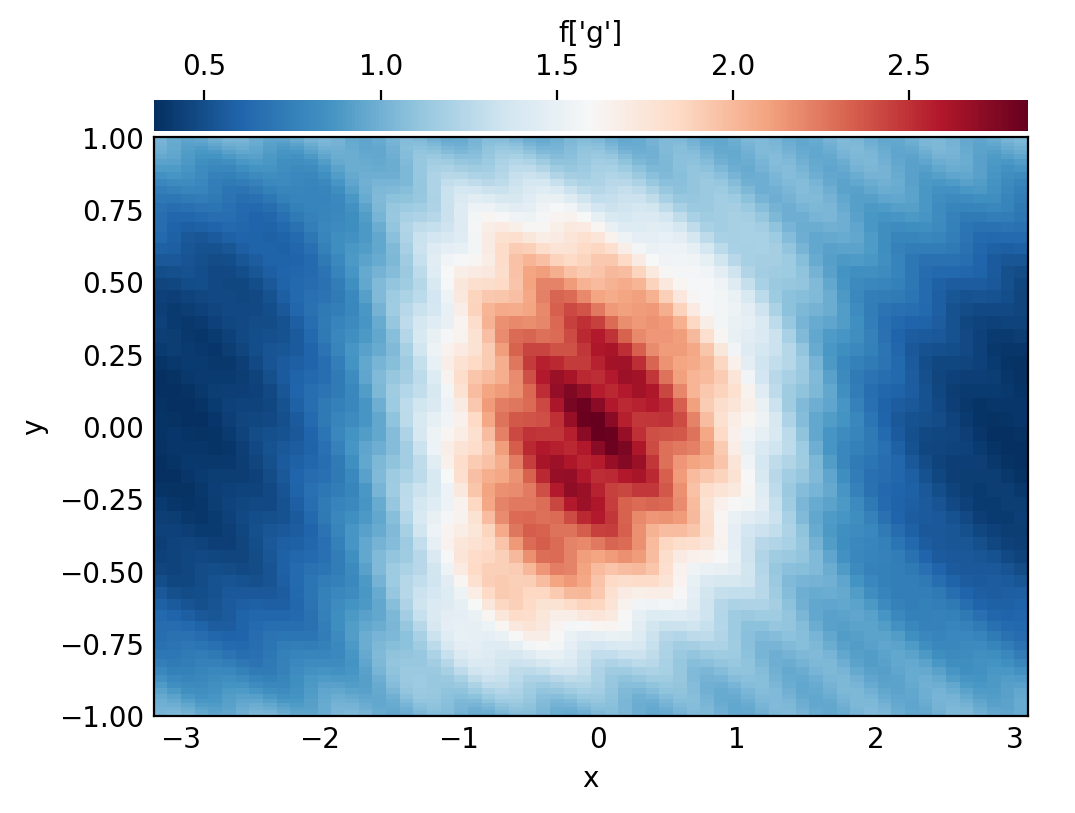

In [7]:
xf = dist.local_grid(xbasis)
yf = dist.local_grid(ybasis)
f['g'] = np.exp((1-yf**2)*np.cos(xf+np.cos(xf)*yf**2)) * (1 + 0.05*np.cos(10*(xf+2*yf)))

# Plot grid values
plot_bot_2d(f, figkw=figkw, title="f['g']");

/tmp/ipykernel_3352/1812536267.py:4: RuntimeWarning: divide by zero encountered in log10
  log_mag = lambda xmesh, ymesh, data: (xmesh, ymesh, np.log10(np.abs(data)))


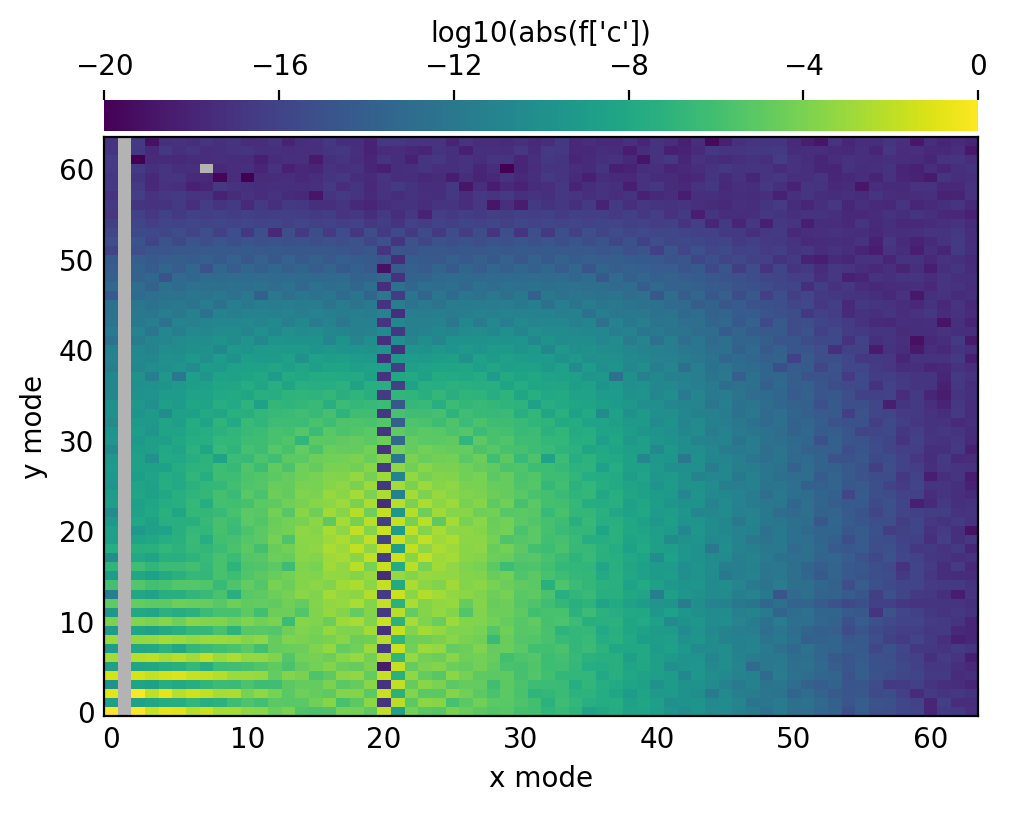

In [8]:
f['c']

# Plot log magnitude of spectral coefficients
log_mag = lambda xmesh, ymesh, data: (xmesh, ymesh, np.log10(np.abs(data)))
plot_bot_2d(f, func=log_mag, clim=(-20, 0), cmap='viridis', title="log10(abs(f['c'])", figkw=figkw);

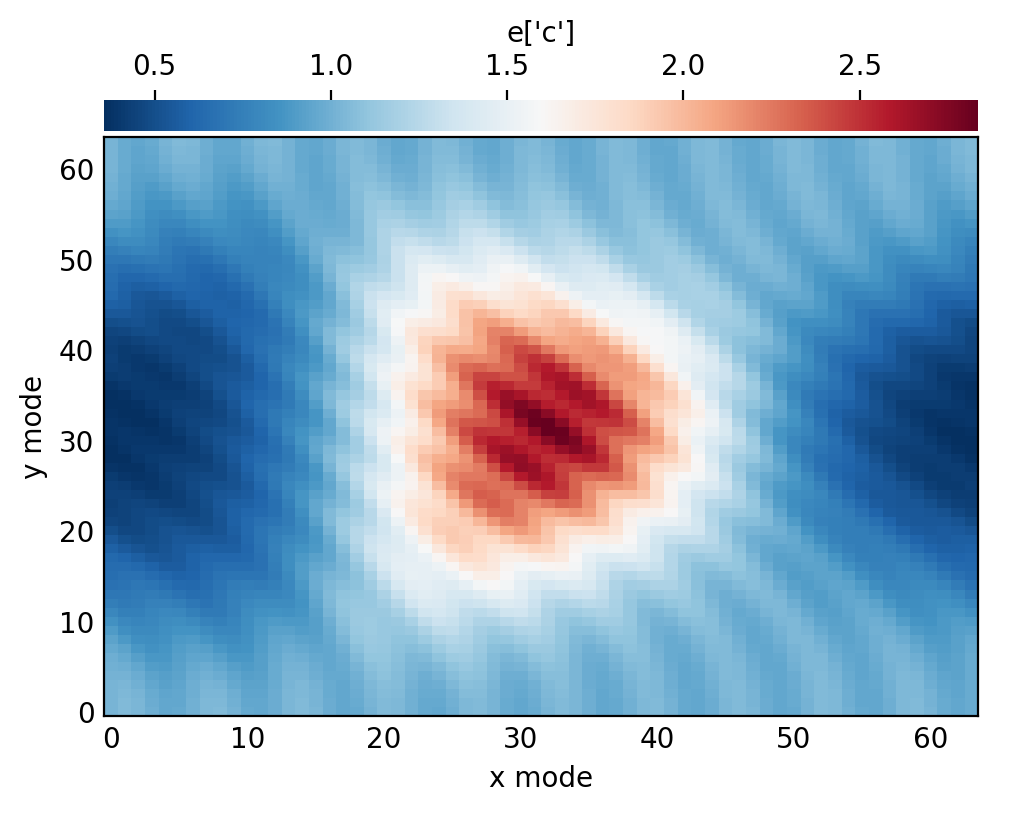

In [9]:
xe = dist.local_grid(xbasis)
ye = dist.local_grid(ybasis)
e['c'] = np.exp((1-ye**2)*np.cos(xe+np.cos(xe)*ye**2)) * (1 + 0.05*np.cos(10*(xe+2*ye)))

# Plot grid values
plot_bot_2d(e, figkw=figkw, title="e['c']");

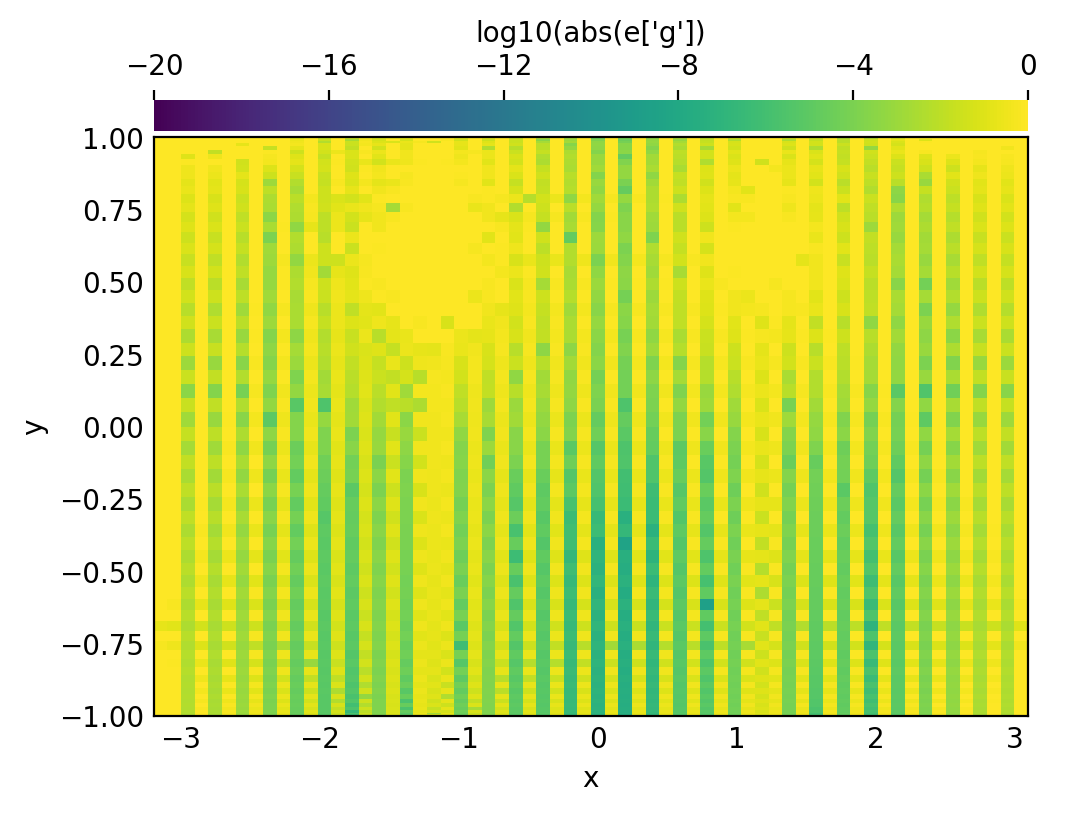

In [10]:
e['g']

# Plot log magnitude of spectral coefficients
log_mag = lambda xmesh, ymesh, data: (xmesh, ymesh, np.log10(np.abs(data)))
plot_bot_2d(e, func=log_mag, clim=(-20, 0), cmap='viridis', title="log10(abs(e['g'])", figkw=figkw);

In [11]:
u['g'].shape

(2, 64, 1)

Higher Res

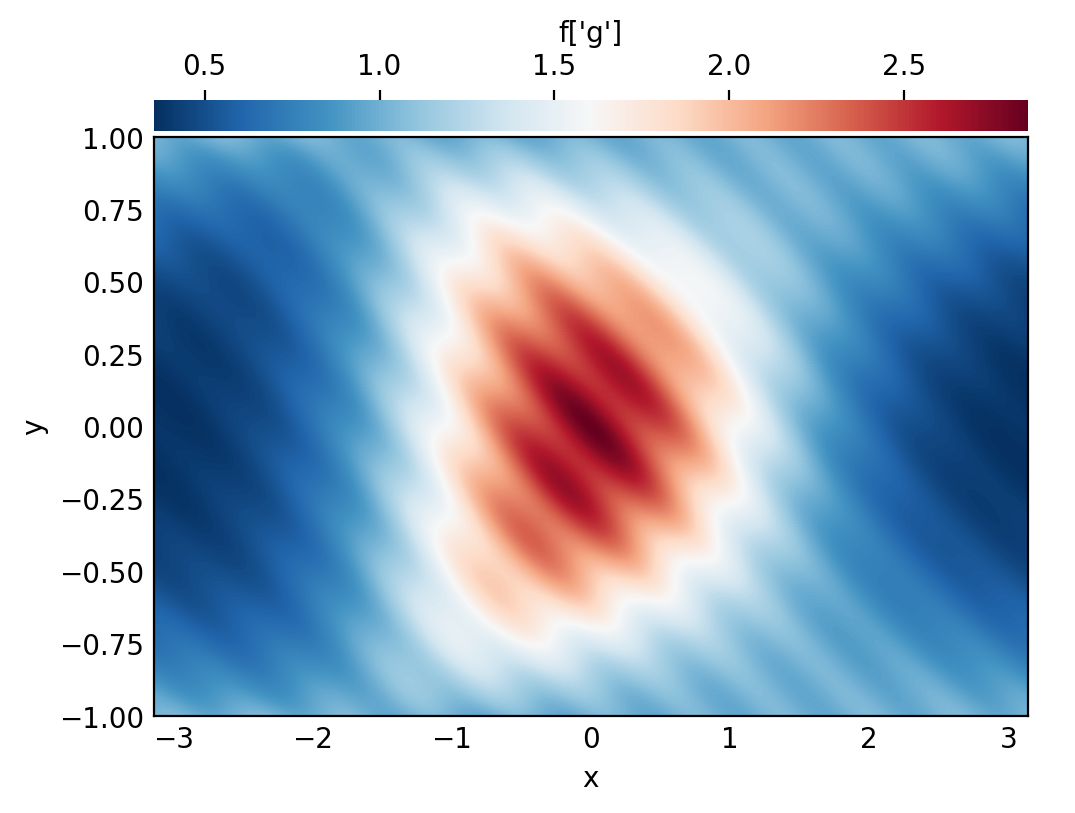

In [12]:
f.change_scales(100)

# Plot grid values
f['g']
plot_bot_2d(f, title="f['g']", figkw=figkw);

very low res, so low data is lost

In [13]:
"""f.change_scales(0.05)

# Plot grid values
f['g']
plot_bot_2d(f, title="f['g']", figkw=figkw);"""

'f.change_scales(0.05)\n\n# Plot grid values\nf[\'g\']\nplot_bot_2d(f, title="f[\'g\']", figkw=figkw);'

Back to the high res, same high res as before. but due to lost info it becomes a different graph

In [14]:
"""f.change_scales(100)

# Plot grid values
f['g']
plot_bot_2d(f, title="f['g']", figkw=figkw);"""

'f.change_scales(100)\n\n# Plot grid values\nf[\'g\']\nplot_bot_2d(f, title="f[\'g\']", figkw=figkw);'

Operators

In [44]:
"""new field = 1 - (2/field)"""
g_op = 1 - 2/f
print(g_op)

C(C(1)) + -1*2*Pow(f, -1)


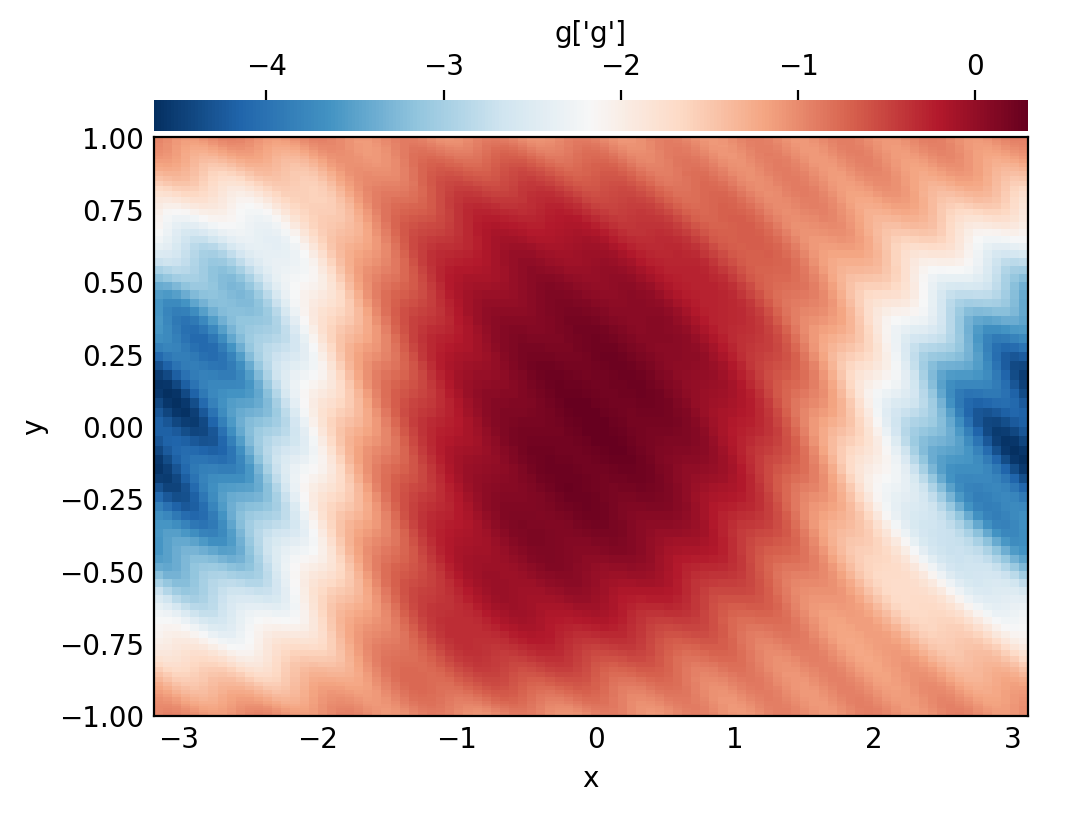

In [45]:
g = g_op.evaluate()

# Plot grid values
g['g']
plot_bot_2d(g, title="g['g']", figkw=figkw);

In [46]:
h_op = 1 / np.cosh(g_op + 2.5)
print(h_op)

Pow(cosh(C(C(1)) + -1*2*Pow(f, -1) + C(C(2.5))), -1)


You can pass operator to operator

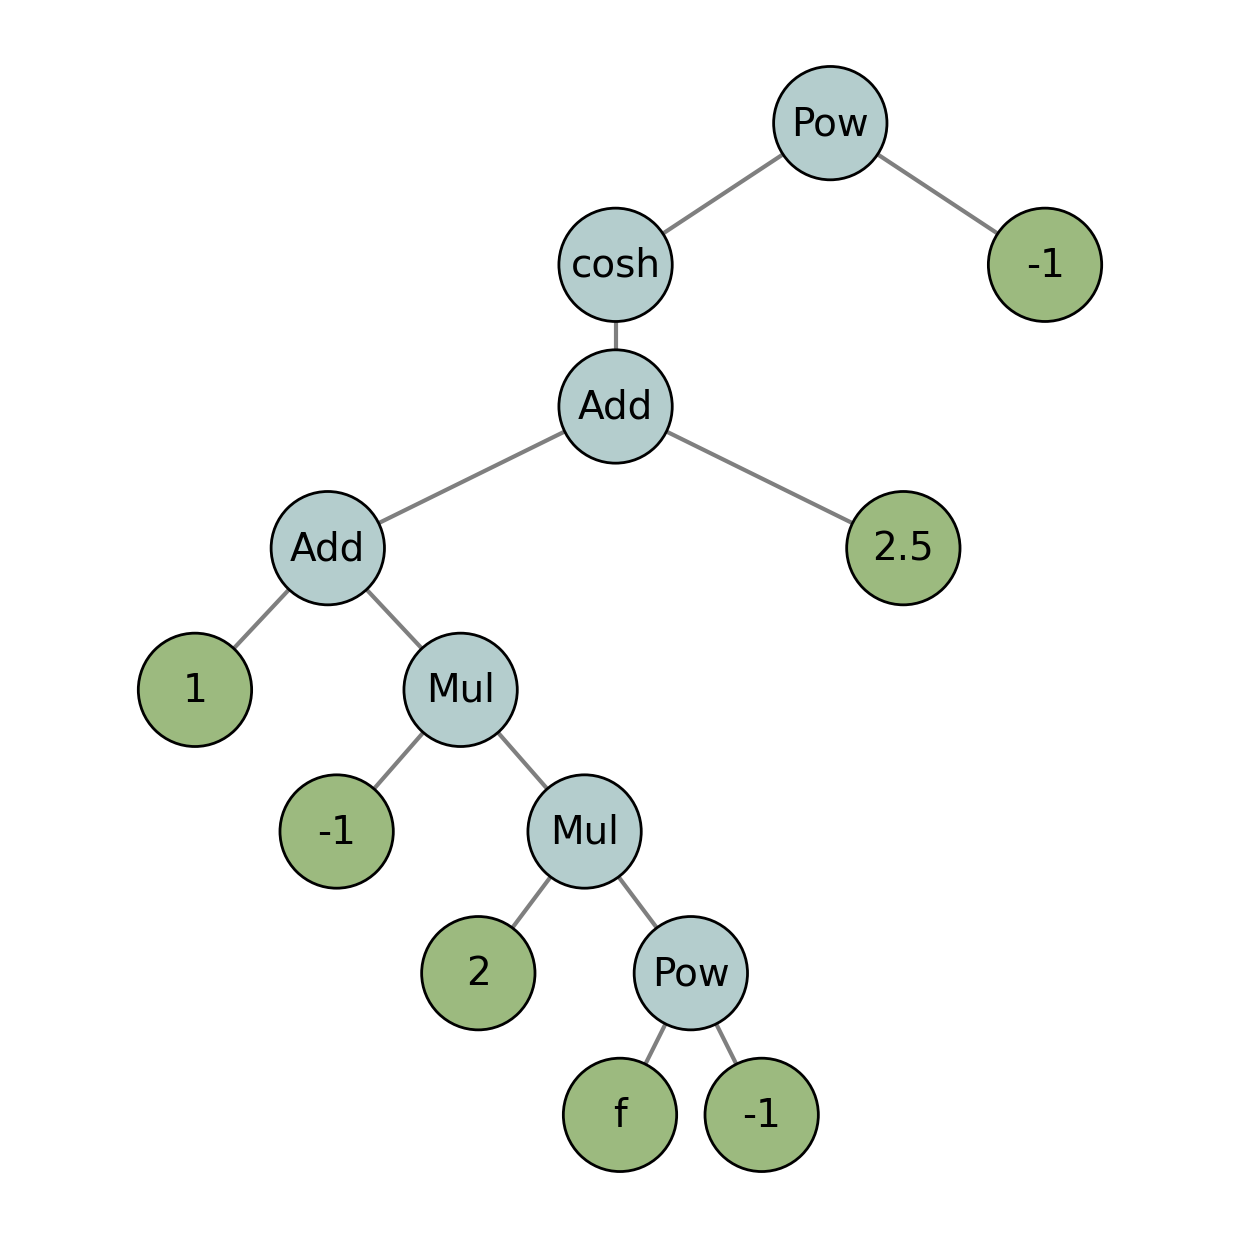

In [41]:
from dedalus.tools.plot_op import plot_operator
plot_operator(h_op, figsize=6, fontsize=14, opsize=0.4)

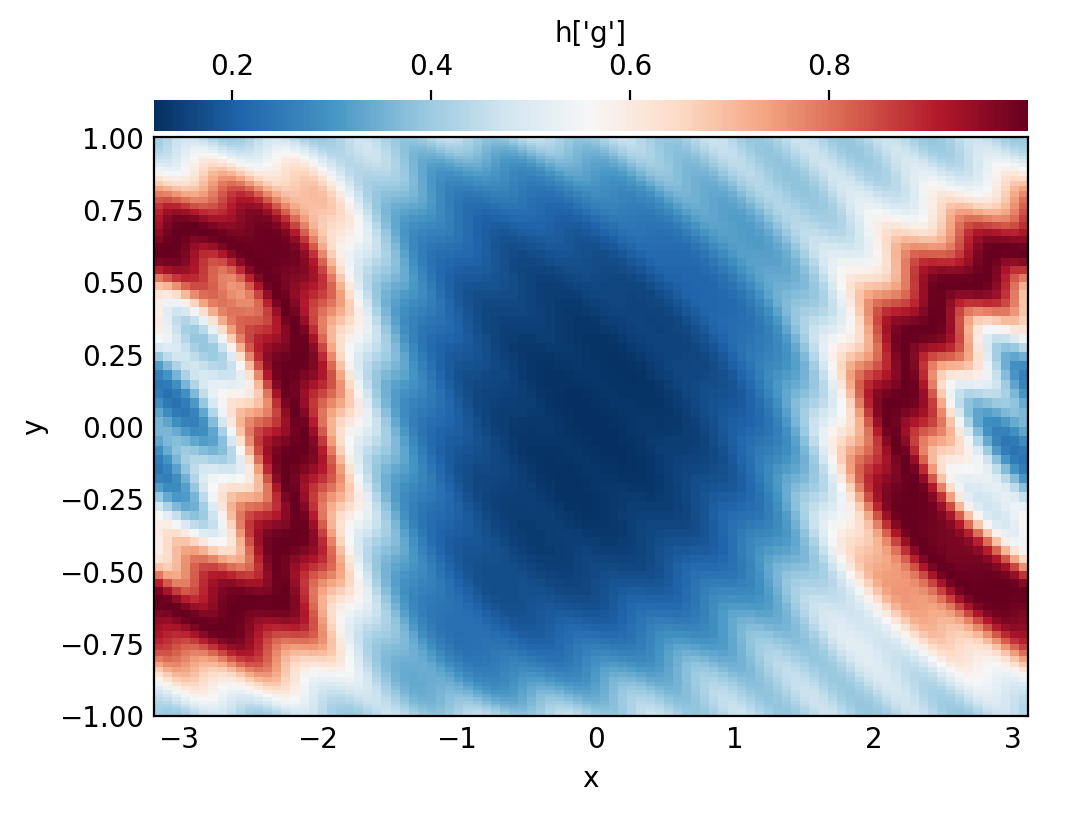

In [47]:
h = h_op.evaluate()

# Plot grid values
h['g']
plot_bot_2d(h, title="h['g']", figkw=figkw);

#### Defered evaluation

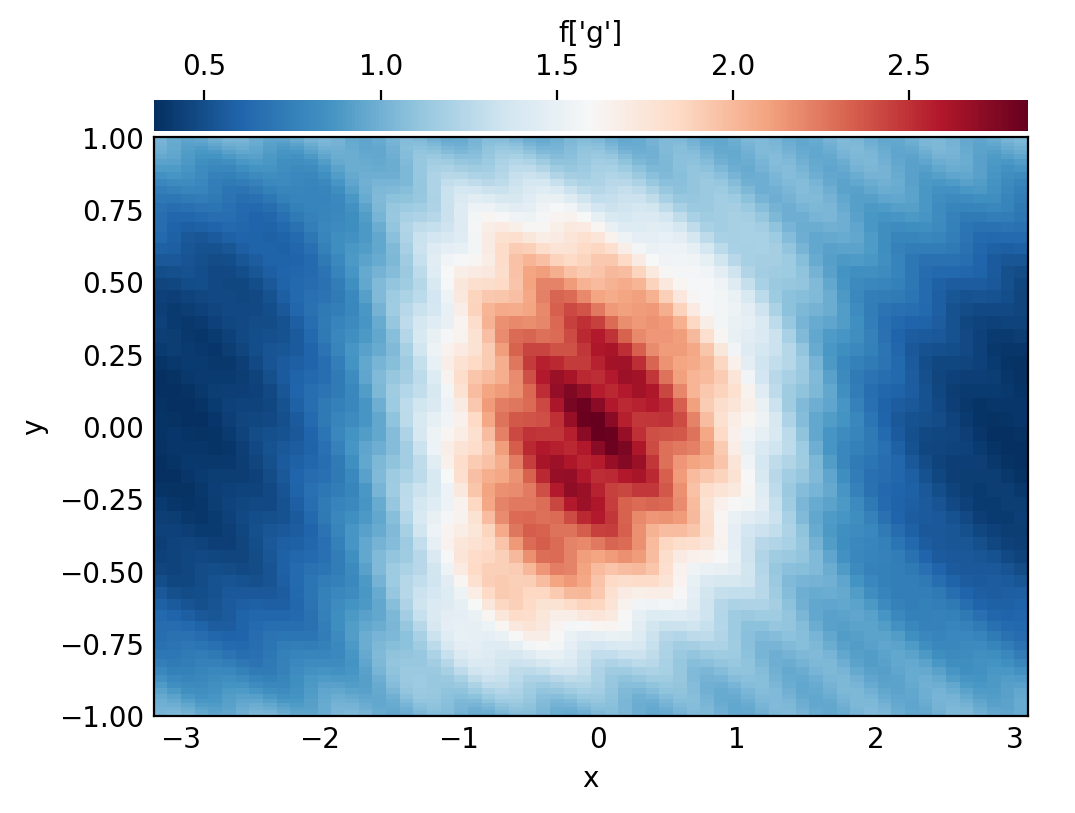

In [49]:
x = dist.local_grid(xbasis)
y = dist.local_grid(ybasis)
f['g'] = np.exp((1-y**2)*np.cos(x+np.cos(x)*y**2)) * (1 + 0.05*np.cos(10*(x+2*y)))

# Plot grid values
plot_bot_2d(f, figkw=figkw, title="f['g']");

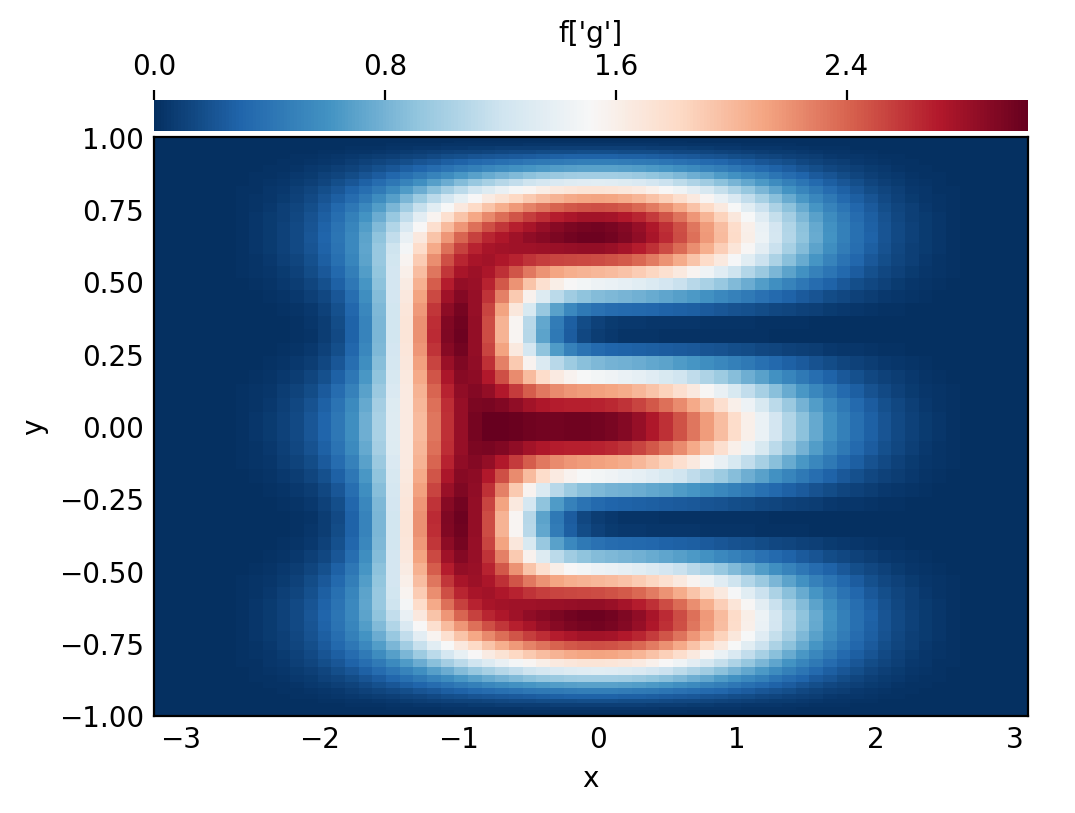

In [56]:
# Change scales back to 1 to build new grid data
f.change_scales(1)
f['g'] = 3*np.cos(1.5*np.pi*y)**2 * np.cos(x/2)**4 + 3*np.exp(-((2*x+2)**2 + (4*y+4/3)**2)) + 3*np.exp(-((2*x+2)**2 + (4*y-4/3)**2))

# Plot grid values
f['g']
plot_bot_2d(f, title="f['g']", figkw=figkw);

/home/ben2121/miniforge3/envs/dedalus3/lib/python3.13/site-packages/dedalus/core/operators.py:588: RuntimeWarning: overflow encountered in cosh
  self.func(arg0.data, out=out.data)


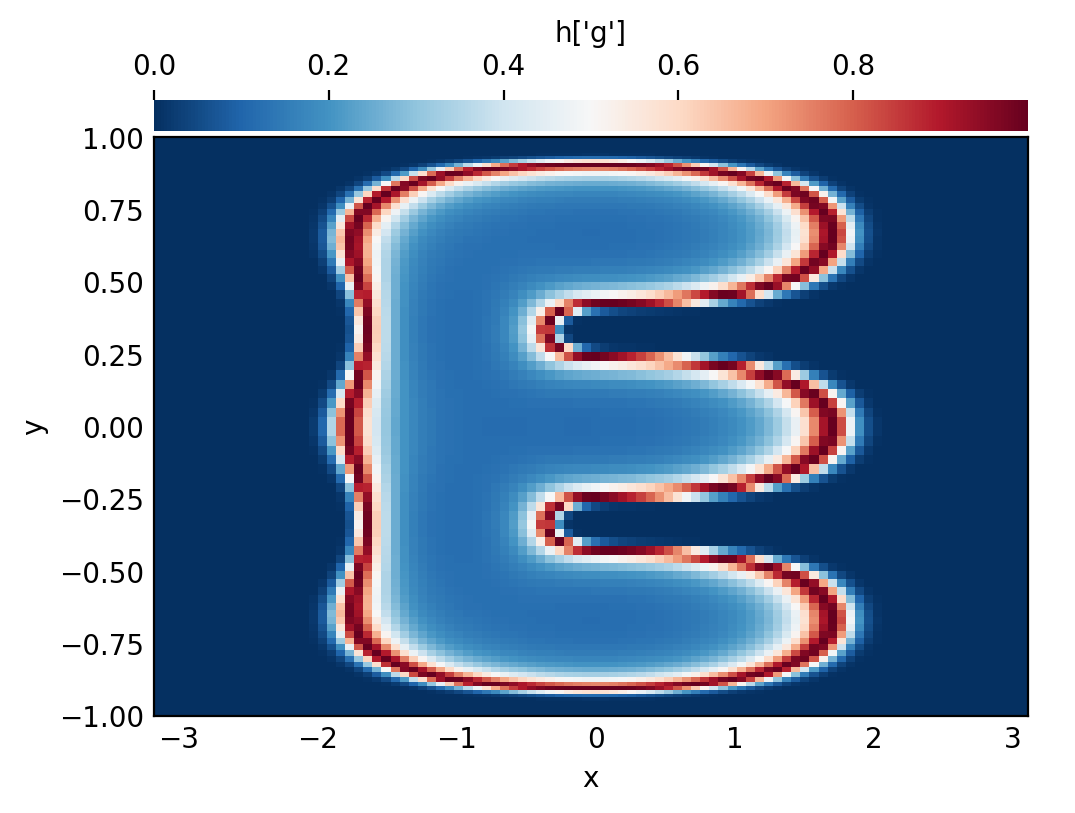

In [57]:
h = h_op.evaluate()

# Plot grid values
h['g']
plot_bot_2d(h, title="h['g']", figkw=figkw);

In [58]:
fx = d3.Differentiate(f, coords['x'])

In [59]:
lap_f = d3.Laplacian(f).evaluate()
grad_f = d3.Gradient(f).evaluate()
print('f shape:', f['g'].shape)
print('Grad(f) shape:', grad_f['g'].shape)
print('Lap(f) shape:', lap_f['g'].shape)

div_grad_f = d3.Divergence(d3.Gradient(f)).evaluate()
print('Lap(f) is Div(Grad(f)):', np.allclose(lap_f['g'], div_grad_f['g']))

f shape: (96, 96)
Grad(f) shape: (2, 96, 96)
Lap(f) shape: (96, 96)
Lap(f) is Div(Grad(f)): True


In [60]:
grad_u = d3.Gradient(u)
transpose_grad_u = d3.TransposeComponents(grad_u)

In [61]:
# Total integral of the field
f_int = d3.Integrate(f, ('x', 'y'))
print('f integral:', f_int.evaluate()['g'])

# Average of the field
f_ave = d3.Average(f, ('x', 'y'))
print('f average:', f_ave.evaluate()['g'])

f integral: [[9.42458659]]
f average: [[0.74998477]]


In [62]:
f00 = f(x=0, y=0)
print('f(0,0):', f00.evaluate()['g'])

f(0,0): [[3.01857352]]
